# EXPLORATORY DATA ANALYSIS

In this notebook, I will show some quick and easy exploratory steps that I usually take when working on these types of dataset (namely finance-related datasets). Hopefully you'll find this notebook somewhat useful.

I will be focusing my attention on the file `2014_Financial_Data.csv`, which is available as past of the dataset **200+ Financial Indicators of US stocks (2014-2018)**. Needless to say, the reported steps can be applied to every `.csv` file.


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Finance related operations
from pandas_datareader import data

# Import this to silence a warning when converting data column of a dataframe on the fly
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

# STEP 1: LOAD DATA

First things first, we need to load the data from the `.csv` file. This is easily done with `pandas`. I like to keep the ticker of the stocks as index of the dataframe, so I specify `index_col=0` when loading the data.

Furthermore, it is convenient to immediately drop those rows where *all* the values are `NaN`.

In [ ]:
# Load data
df_2014 = pd.read_csv('../input/200-financial-indicators-of-us-stocks-20142018/2014_Financial_Data.csv', index_col=0)
df_2015 = pd.read_csv('../input/200-financial-indicators-of-us-stocks-20142018/2015_Financial_Data.csv', index_col=0)
df_2016 = pd.read_csv('../input/200-financial-indicators-of-us-stocks-20142018/2016_Financial_Data.csv', index_col=0)
df_2017 = pd.read_csv('../input/200-financial-indicators-of-us-stocks-20142018/2017_Financial_Data.csv', index_col=0)
df_2018 = pd.read_csv('../input/200-financial-indicators-of-us-stocks-20142018/2018_Financial_Data.csv', index_col=0)
df_years = [df_2014, df_2015, df_2016, df_2017, df_2018]

# STEP 2: FIRST LOOK AT THE DATASET

## STEP 2.1: general info, categorical variables

It is useful to take a quick look at the initial state of the dataset:

1. use `.info()`, `.describe()` method to get a first sense of the dimensions of the dataset and value of numeric variables;
2. focus on the categorical variables and also the class of the samples, to see if they are balanced.

In [ ]:
# Get info about dataset
df_2014.info()

# Describe dataset variables
df_2018.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3808 entries, PG to WTT
Columns: 224 entries, Revenue to Class
dtypes: float64(222), int64(1), object(1)
memory usage: 6.5+ MB


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.346000e+03,4253.000000,4.207000e+03,4.328000e+03,4.155000e+03,4.226000e+03,4.208000e+03,4.357000e+03,4.208000e+03,4.321000e+03,...,4067.000000,4268.000000,4160.000000,4178.000000,4121.000000,4128.000000,4133.000000,4144.000000,4392.000000,4392.000000
mean,5.119287e+09,3.455278,3.144946e+09,2.043954e+09,1.180176e+08,9.005022e+08,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,...,0.006081,36.768524,0.183066,1.389013,0.262530,9.928446,0.091891,0.153610,20.803948,0.693534
std,2.049504e+10,195.504906,1.508813e+10,7.682369e+09,9.330891e+08,3.661116e+09,5.529831e+09,2.969341e+09,3.780021e+08,2.639327e+09,...,0.239653,2347.079237,4.688013,35.123904,5.612666,363.717734,0.823281,0.839647,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.501425e+07,0.000000,3.415500e+06,3.618903e+07,0.000000e+00,2.056226e+07,4.223644e+07,-5.510000e+06,0.000000e+00,-1.000800e+07,...,0.000000,-0.048075,0.000000,-0.036700,-0.108600,-0.082850,0.000000,-0.004650,-7.477173,0.000000
50%,4.982640e+08,0.074900,1.741180e+08,2.219470e+08,0.000000e+00,9.390450e+07,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,...,0.000000,0.010200,0.000000,0.034750,0.026100,0.000000,0.000000,0.065700,17.639393,1.000000
75%,2.457878e+09,0.188500,1.297814e+09,9.767015e+08,1.450150e+07,4.117162e+08,6.796040e+08,2.862690e+08,5.817075e+07,2.238810e+08,...,0.042050,0.185900,0.080050,0.160575,0.138400,0.115425,0.009700,0.167625,39.625879,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


We now know that we have:
- 3808 samples
- 224 columns
 - 222 numeric --> they are the financial indicators
 - 1 int       --> this is the class column
 - 1 object    --> this is categorical (`Sector`)

Next, we will take a look at the distribution of the class values, and the distribution of the categorical variable `Sector`.

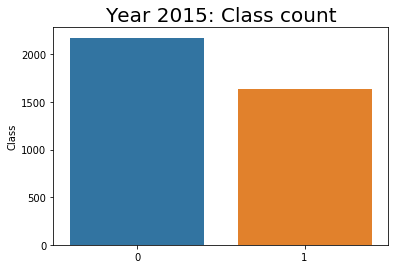

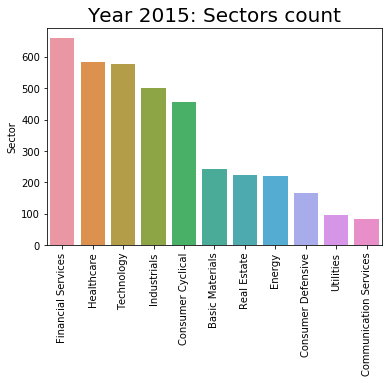

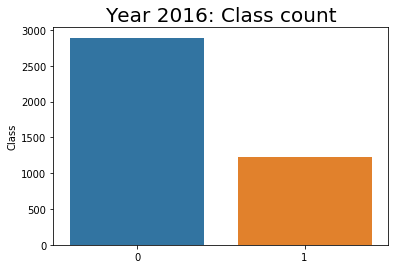

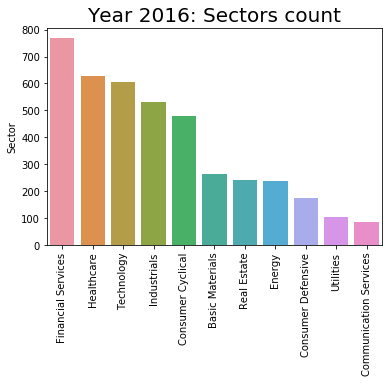

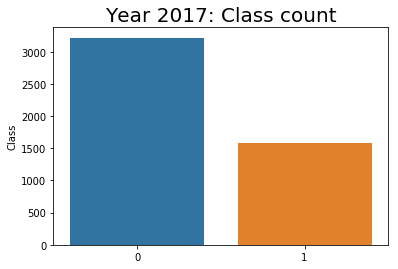

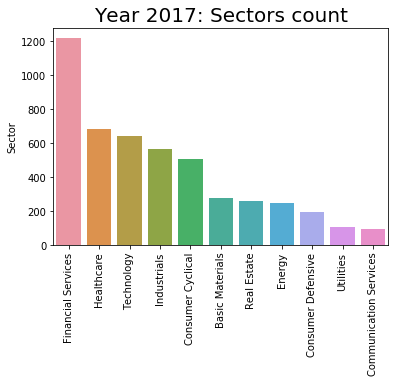

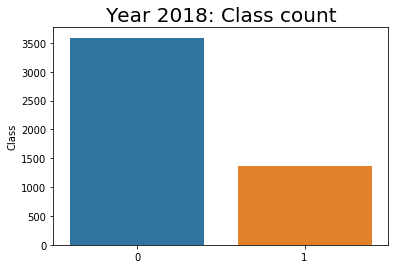

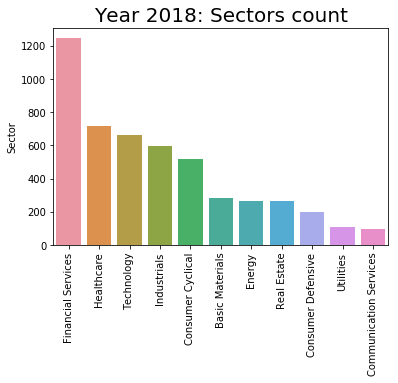

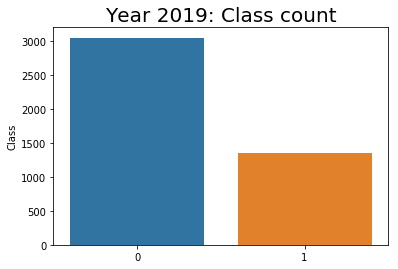

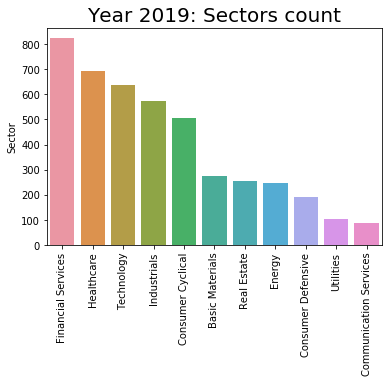

In [ ]:
y = 2015
for df in df_years:
    
    # Plot class distribution
    df_class = df['Class'].value_counts()
    sns.barplot(np.arange(len(df_class)), df_class)
    plt.title('Year '+str(y)+': Class count', fontsize=20)
    plt.show()

    # Plot sector distribution
    df_sector = df['Sector'].value_counts()
    sns.barplot(np.arange(len(df_sector)), df_sector)
    plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation=90)
    plt.title('Year '+str(y)+': Sectors count', fontsize=20)
    plt.show()
    y += 1

The plots above show that:
1. **the samples are not balanced in terms of class**. Indeed, 2174 samples belong to class `0`, which as explained in the documentation of the dataset correspond to stocks that are *not buy-worthy*. At the same time, 1634 samples belong to class `1`, meaning they are *buy-worthy* stocks. This should be accounted for when splitting the data between training and testing data (it is useful to use the `stratify` option available within `sklearn.model_selection.train_test_split`).
2. there is a total of 11 sectors, 5 of them with about 500+ stocks each, while the remaining 6 sectors have less than 300 stocks. In particular, the sectors *Utilities* and *Communication Services* have around 100 samples. This has to be kept in mind if we want to use this data with ML algorithms: there are very few samples, which could lead to overfitting, etc.

## STEP 2.2: price variation, look for outliers/errors

It is always important to make sure that the target data *makes sense*. I am particularly curious to see if the column `2015 PRICE VAR [%]`, which lists the percent price variation of each stock during the year 2015, contains any *mistake* (for instance mistypings or unreasonable values). A quick plot of this column (for each sector), will allow us to assess the situation.

In layman's terms, here we are looking for major peaks/valleys, which indicate stocks that increased/decreased in value by an incredible amount with respect to the overall sector's trend.

Thanks to this check, we can clearly see that there are indeed some major peaks in the following sectors:

* Consumer Defensive
* Basic Materials
* Healthcare
* Consumer Cyclical
* Real Estate
* Energy
* Financial Services
* Technology

This means that, for one reason or another, some stocks experienced incredible gains. However, how can be sure that each of these gains is organic (i.e. due to trading activity)?

We can take a closer look at this situation by plotting the price trend for those **stocks that increased their value by more than 500% during 2015**. While it is possible for a stock to experience such gains, I'd still like to verify it with my eyes.

Here, we will use `pandas_datareader` to pull the *Adjusted Close* daily price, during 2015, of the required stocks. To further investigate these stocks, I think it is worth to plot the *Volume* too.

As we can see, most of the `top_gainers` stocks did not experienced an organic growth during 2015. This is highlighted by a portion of the price trend being completely flat, due to the absence of trading activity.

So, I reckon that only the last 2 stocks from the `top_gainers`, namely **NYMX** and **AVXL**, should be kept in the dataframe and we should drop the others.

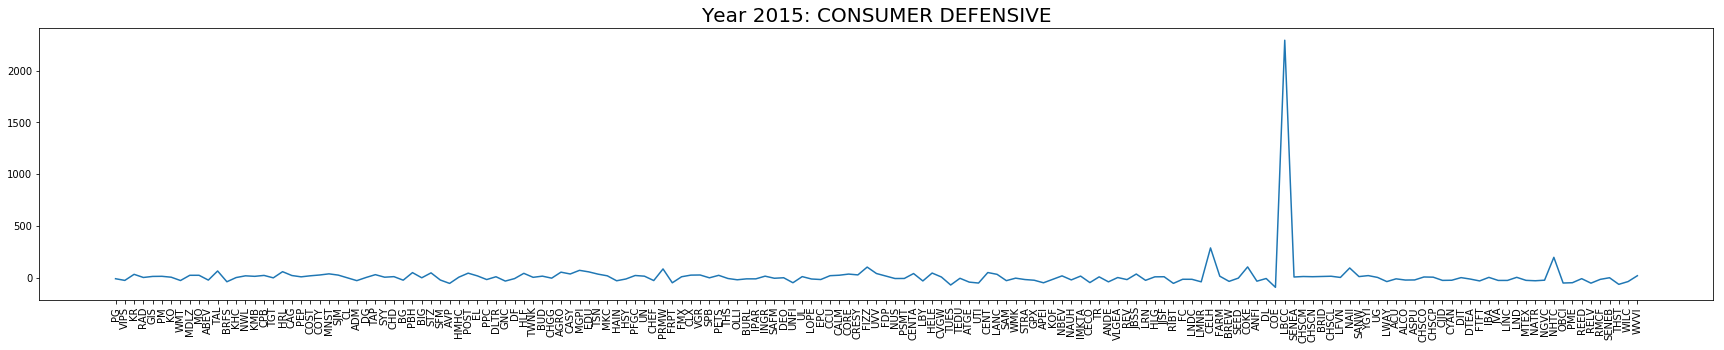

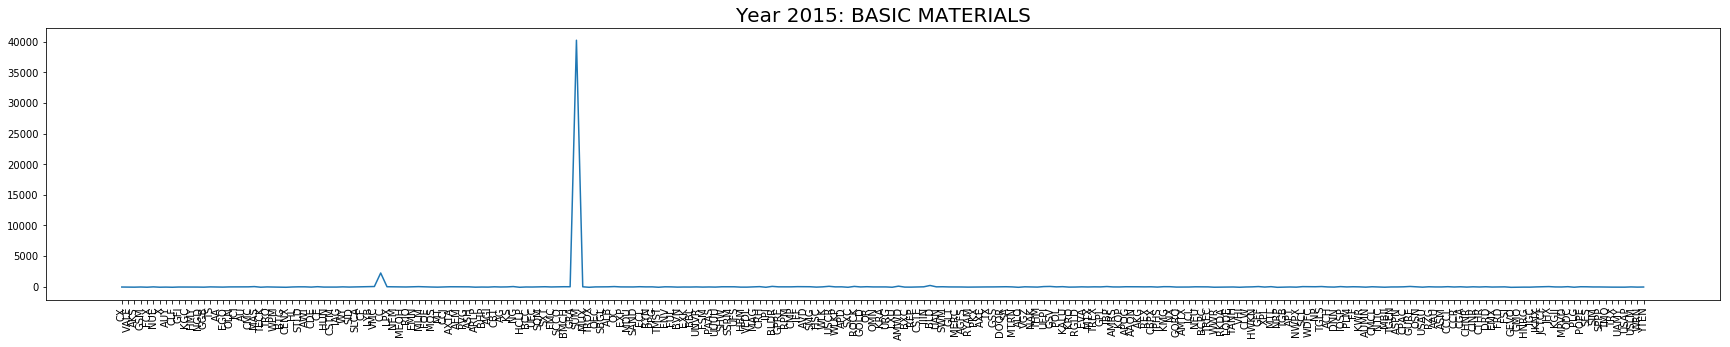

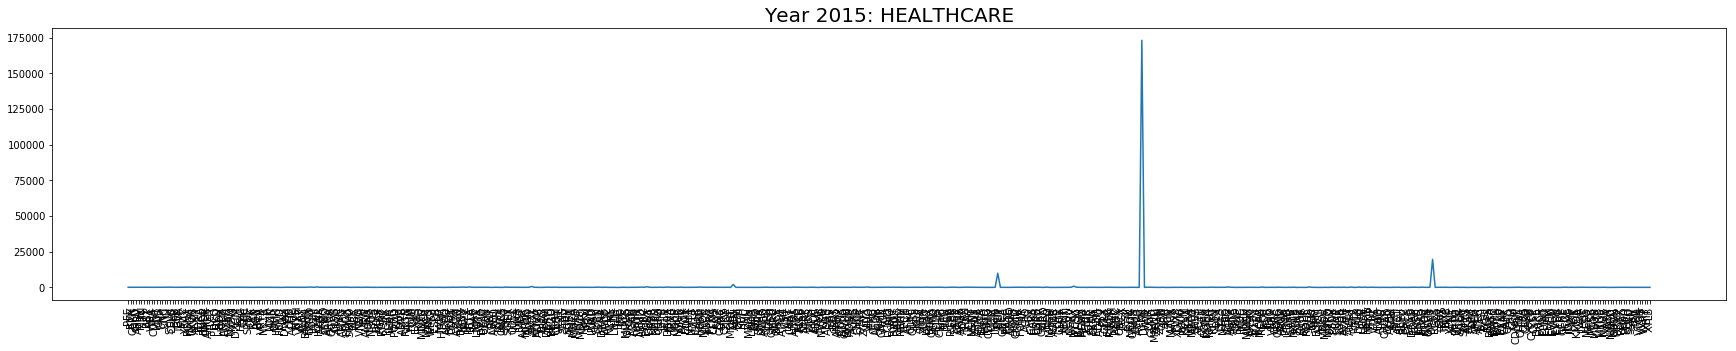

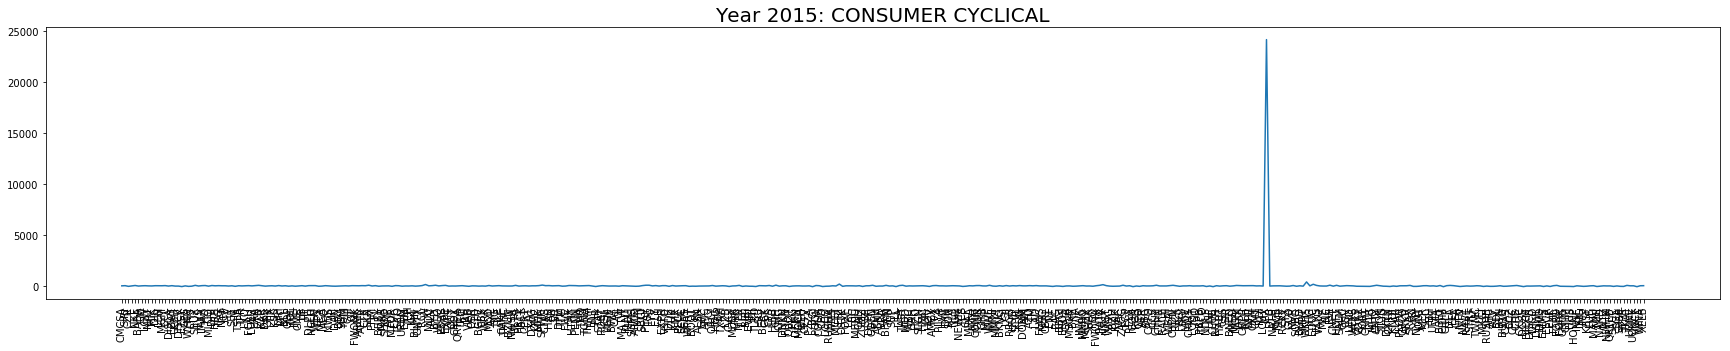

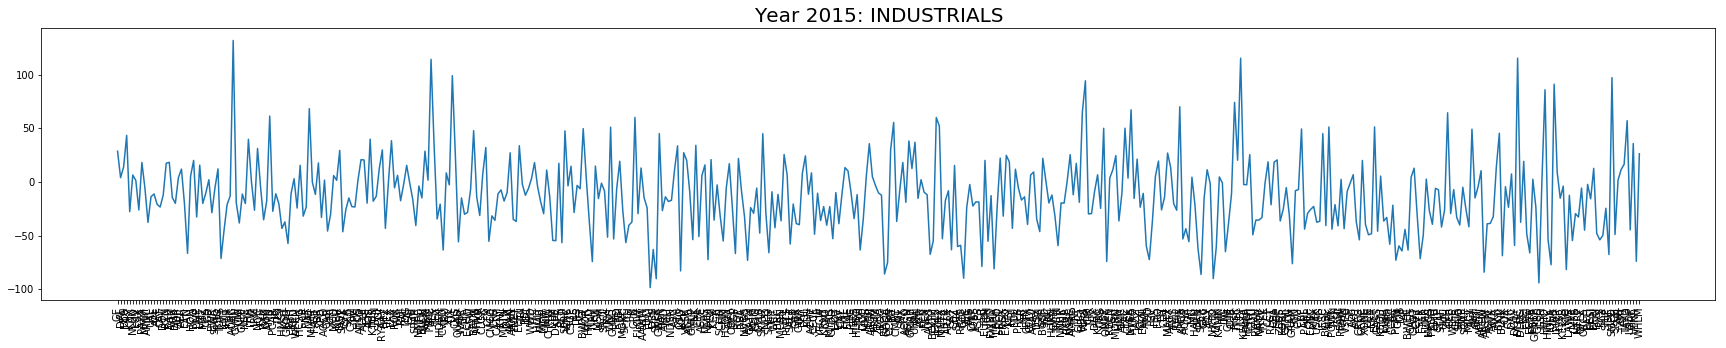

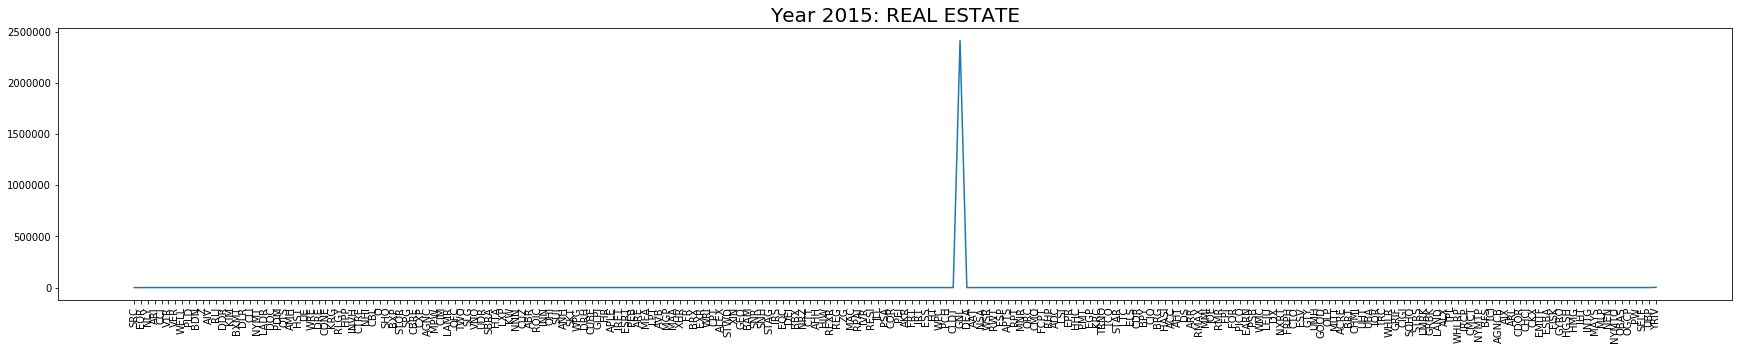

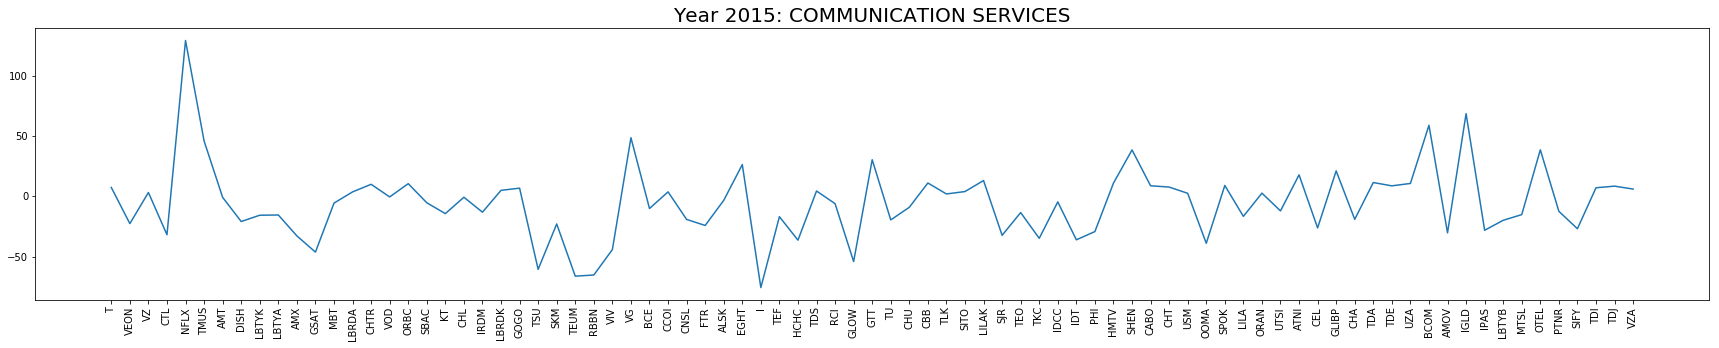

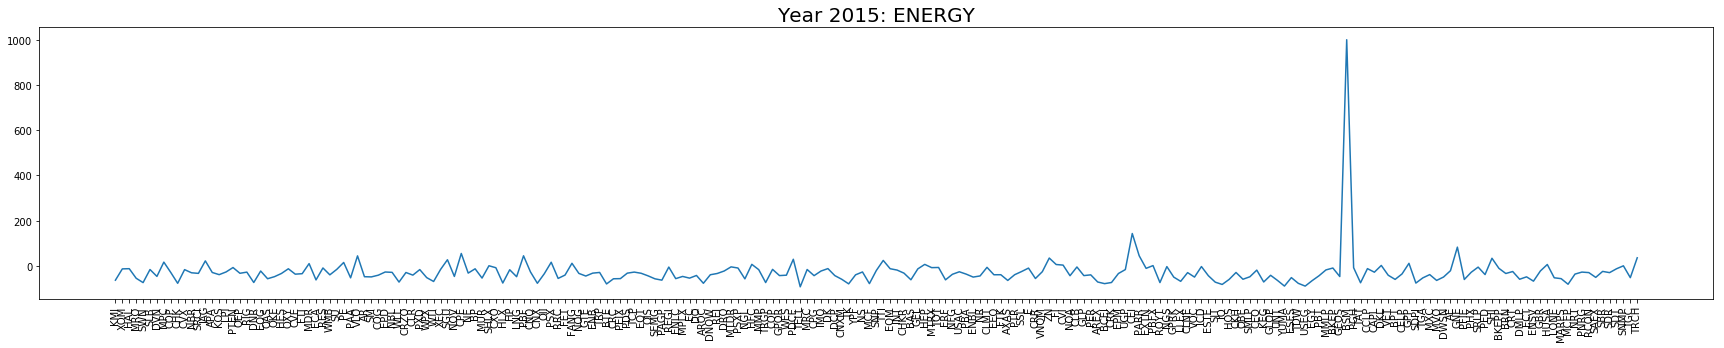

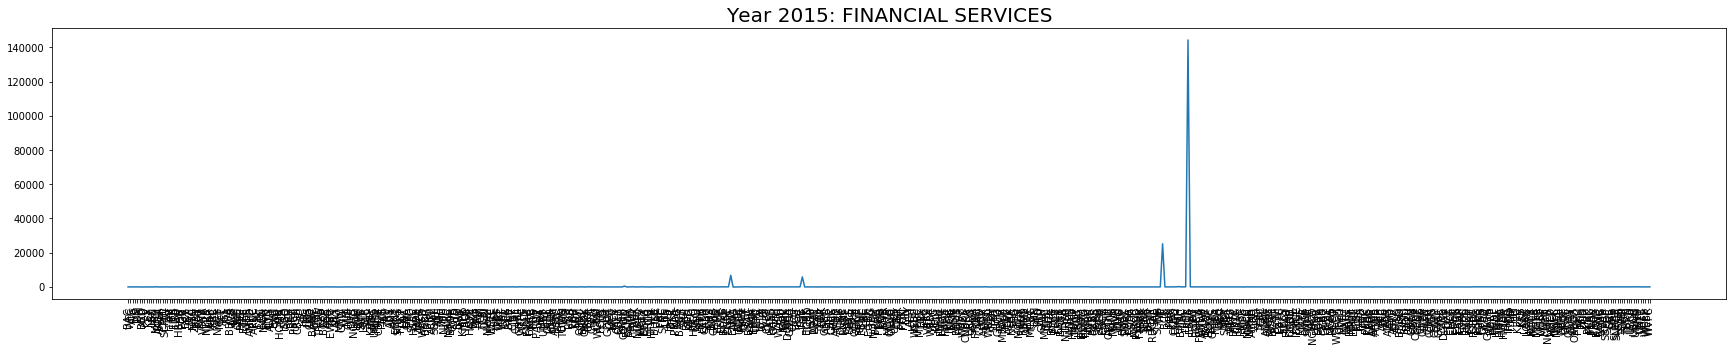

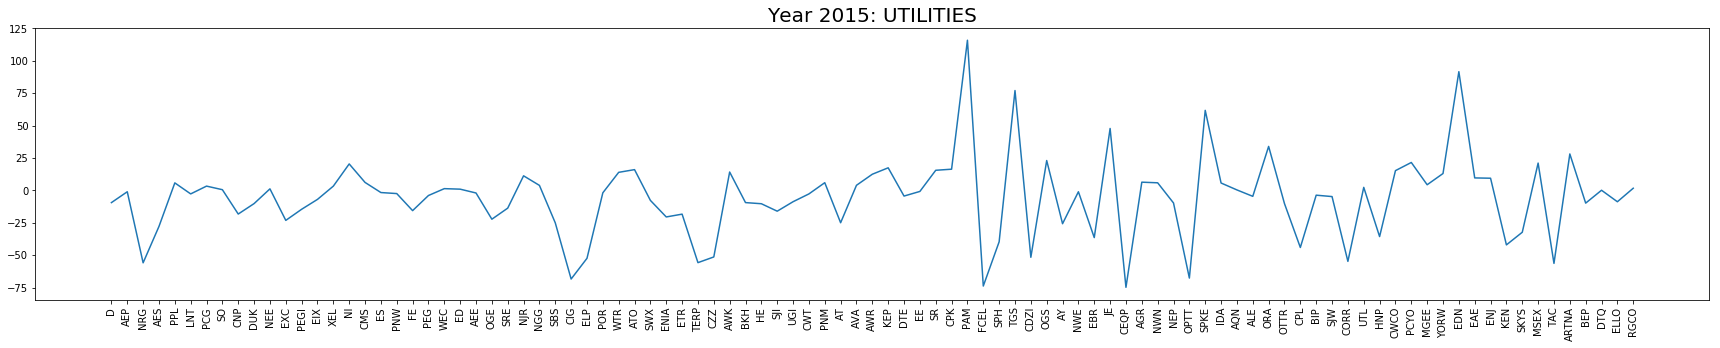

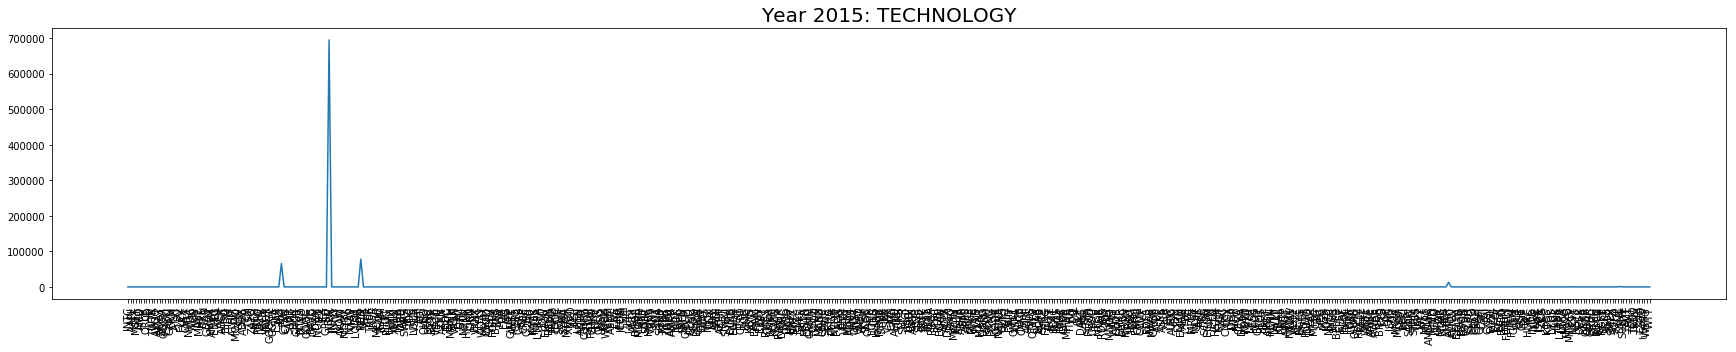

In [ ]:
# Extract the columns we need in this step from the dataframe
df_ = df_2014.loc[:, ['Sector', '2015 PRICE VAR [%]']]

# Get list of sectors
sector_list = df_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    #continue
    temp = df_[df_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2015 PRICE VAR [%]'])
    plt.xticks(rotation=90)
    plt.title('Year 2015: '+sector.upper(), fontsize=20)
    plt.show()

In [ ]:
# Get stocks that increased more than 500%
gain = 500
top_gainers = df_[df_['2015 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2015 PRICE VAR [%]'].sort_values(ascending=False)
top_gainers.drop('PUB', inplace=True)

In [ ]:
# Get stocks that increased more than 500%

gain = 500
top_gainers = df_[df_['2015 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2015 PRICE VAR [%]'].sort_values(ascending=False)
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()

# Set
date_start = '01-01-2015'
date_end = '12-31-2015'
tickers = top_gainers.index.values.tolist()

for ticker in tickers:
    continue
    # Pull daily prices for each ticker from Yahoo Finance
    daily_price = data.DataReader(ticker, 'yahoo', date_start, date_end)
    continue
    # Plot prices with volume
    fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    
    ax0.plot(daily_price['Adj Close'])
    ax0.set_title(ticker, fontsize=18)
    ax0.set_ylabel('Daily Adj Close $', fontsize=14)
    ax1.plot(daily_price['Volume'])
    ax1.set_ylabel('Volume', fontsize=14)
    ax1.yaxis.set_major_formatter(
            matplotlib.ticker.StrMethodFormatter('{x:.0E}'))
    
    fig.align_ylabels(ax1)
    fig.tight_layout()
    plt.show()


22 STOCKS with more than 500% gain.



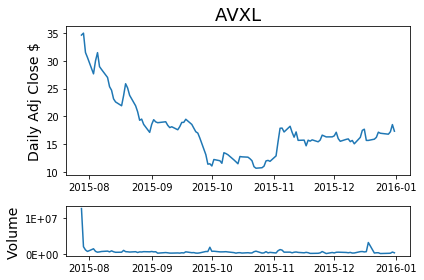

In [ ]:
# Plot prices with volume
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

ax0.plot(daily_price['Adj Close'])
ax0.set_title(ticker, fontsize=18)
ax0.set_ylabel('Daily Adj Close $', fontsize=14)
ax1.plot(daily_price['Volume'])
ax1.set_ylabel('Volume', fontsize=14)
ax1.yaxis.set_major_formatter(
        matplotlib.ticker.StrMethodFormatter('{x:.0E}'))

fig.align_ylabels(ax1)
fig.tight_layout()
plt.show()

In [ ]:
# Drop those stocks with inorganic gains
inorganic_stocks = tickers 
df_2014.drop(inorganic_stocks, axis=0, inplace=True)
# Check again for gain-outliers
df_ = df_2014.loc[:, ['Sector', '2015 PRICE VAR [%]']]
sector_list = df_['Sector'].unique()

for sector in sector_list:
    continue
    temp = df_[df_['Sector'] == sector] # get all data for one sector

    plt.figure(figsize=(30,5))
    plt.plot(temp['2015 PRICE VAR [%]'])
    plt.title('Year 2015: '+sector.upper(), fontsize=20)
    plt.show()

In [ ]:
# Extract the columns we need in this step from the dataframe
df_ = df_2015.loc[:, ['Sector', '2016 PRICE VAR [%]']]

# Get list of sectors
sector_list = df_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    continue
    temp = df_[df_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2016 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

In [ ]:
# Get stocks that increased more than 500%
gain = 500
top_gainers = df_[df_['2016 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2016 PRICE VAR [%]'].sort_values(ascending=False)
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()

# Set
date_start = '01-01-2016'
date_end = '12-31-2016'
tickers = top_gainers.index.values.tolist()

for ticker in tickers:
    continue
    # Pull daily prices for each ticker from Yahoo Finance
    daily_price = data.DataReader(ticker, 'yahoo', date_start, date_end)
    
    # Plot prices with volume
    fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    
    ax0.plot(daily_price['Adj Close'])
    ax0.set_title(ticker, fontsize=18)
    ax0.set_ylabel('Daily Adj Close $', fontsize=14)
    ax1.plot(daily_price['Volume'])
    ax1.set_ylabel('Volume', fontsize=14)
    ax1.yaxis.set_major_formatter(
            matplotlib.ticker.StrMethodFormatter('{x:.0E}'))
    fig.align_ylabels(ax1)
    fig.tight_layout()
    plt.show()

10 STOCKS with more than 500% gain.



In [ ]:
# Drop those stocks with inorganic gains
inorganic_stocks = tickers
df_2015.drop(inorganic_stocks, axis=0, inplace=True)
# Check again for gain-outliers
df_ = df_2015.loc[:, ['Sector', '2016 PRICE VAR [%]']]
sector_list = df_['Sector'].unique()

for sector in sector_list:
    continue
    temp = df_[df_['Sector'] == sector] # get all data for one sector

    plt.figure(figsize=(30,5))
    plt.plot(temp['2016 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

In [ ]:
# Extract the columns we need in this step from the dataframe
df_ = df_2016.loc[:, ['Sector', '2017 PRICE VAR [%]']]

# Get list of sectors
sector_list = df_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    continue
    temp = df_[df_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2017 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    #plt.show()
    
# Get stocks that increased more than 500%
gain = 500
top_gainers = df_[df_['2017 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2017 PRICE VAR [%]'].sort_values(ascending=False)
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()

# Set
date_start = '01-01-2017'
date_end = '12-31-2017'
tickers = top_gainers.index.values.tolist()
tickers.remove('JAG')
tickers.remove('FTNW')
print(tickers)


19 STOCKS with more than 500% gain.

['JPT', 'ALT', 'AQB', 'HCC', 'INVH', 'CBH', 'LBC', 'RMBL', 'AKCA', 'LOV', 'LX', 'LFIN', 'GRVY', 'RIOT', 'MRNS', 'XOMA', 'HLG']


In [ ]:
for ticker in tickers:
    continue
    # Pull daily prices for each ticker from Yahoo Finance
    daily_price = data.DataReader(ticker, 'yahoo', date_start, date_end)
        
    # Plot prices with volume
    fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    
    ax0.plot(daily_price['Adj Close'])
    ax0.set_title(ticker, fontsize=18)
    ax0.set_ylabel('Daily Adj Close $', fontsize=14)
    ax1.plot(daily_price['Volume'])
    ax1.set_ylabel('Volume', fontsize=14)
    ax1.yaxis.set_major_formatter(
            matplotlib.ticker.StrMethodFormatter('{x:.0E}'))

    fig.align_ylabels(ax1)
    fig.tight_layout()
    #plt.show()

# Drop those stocks with inorganic gains
inorganic_stocks = tickers[:-2] # all except last 2
df_2016.drop(inorganic_stocks, axis=0, inplace=True)
# Check again for gain-outliers
df_ = df_2016.loc[:, ['Sector', '2017 PRICE VAR [%]']]
sector_list = df_['Sector'].unique()

for sector in sector_list:
    continue
    temp = df_[df_['Sector'] == sector] # get all data for one sector

    plt.figure(figsize=(30,5))
    plt.plot(temp['2017 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

In [ ]:
# Extract the columns we need in this step from the dataframe
df_ = df_2017.loc[:, ['Sector', '2018 PRICE VAR [%]']]

# Get list of sectors
sector_list = df_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    continue
    temp = df_[df_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2018 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    #plt.show()
    
# Get stocks that increased more than 500%
gain = 500
top_gainers = df_[df_['2018 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2018 PRICE VAR [%]'].sort_values(ascending=False)
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()

# Set
date_start = '01-01-2018'
date_end = '12-31-2018'
tickers = top_gainers.index.values.tolist()

for ticker in tickers:
    continue
    # Pull daily prices for each ticker from Yahoo Finance
    daily_price = data.DataReader(ticker, 'yahoo', date_start, date_end)
    
    # Plot prices with volume
    fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    
    ax0.plot(daily_price['Adj Close'])
    ax0.set_title(ticker, fontsize=18)
    ax0.set_ylabel('Daily Adj Close $', fontsize=14)
    ax1.plot(daily_price['Volume'])
    ax1.set_ylabel('Volume', fontsize=14)
    ax1.yaxis.set_major_formatter(
            matplotlib.ticker.StrMethodFormatter('{x:.0E}'))

    fig.align_ylabels(ax1)
    fig.tight_layout()
    plt.show()

# Drop those stocks with inorganic gains
inorganic_stocks = tickers # all except last 2
df_2017.drop(inorganic_stocks, axis=0, inplace=True)
# Check again for gain-outliers
df_ = df_2017.loc[:, ['Sector', '2018 PRICE VAR [%]']]
sector_list = df_['Sector'].unique()

for sector in sector_list:
    continue
    temp = df_[df_['Sector'] == sector] # get all data for one sector

    plt.figure(figsize=(30,5))
    plt.plot(temp['2018 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

5 STOCKS with more than 500% gain.



In [ ]:
# Extract the columns we need in this step from the dataframe
df_ = df_2018.loc[:, ['Sector', '2019 PRICE VAR [%]']]

# Get list of sectors
sector_list = df_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    continue
    temp = df_[df_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2019 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()
    
# Get stocks that increased more than 500%
gain = 500
top_gainers = df_[df_['2019 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2019 PRICE VAR [%]'].sort_values(ascending=False)
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()

# Set
date_start = '01-01-2019'
date_end = '12-31-2019'
tickers = top_gainers.index.values.tolist()
tickers.remove('ANFI')
tickers.remove('SSI')
tickers.remove('ARQL')

for ticker in tickers:
    continue
    # Pull daily prices for each ticker from Yahoo Finance
    daily_price = data.DataReader(ticker, 'yahoo', date_start, date_end)
    
    # Plot prices with volume
    fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    
    ax0.plot(daily_price['Adj Close'])
    ax0.set_title(ticker, fontsize=18)
    ax0.set_ylabel('Daily Adj Close $', fontsize=14)
    ax1.plot(daily_price['Volume'])
    ax1.set_ylabel('Volume', fontsize=14)
    ax1.yaxis.set_major_formatter(
            matplotlib.ticker.StrMethodFormatter('{x:.0E}'))

    fig.align_ylabels(ax1)
    fig.tight_layout()
    plt.show()

# Drop those stocks with inorganic gains
inorganic_stocks = tickers
df_2018.drop(inorganic_stocks, axis=0, inplace=True)
# Check again for gain-outliers
df_ = df_2018.loc[:, ['Sector', '2019 PRICE VAR [%]']]
sector_list = df_['Sector'].unique()

for sector in sector_list:
    continue
    temp = df_[df_['Sector'] == sector] # get all data for one sector

    plt.figure(figsize=(30,5))
    plt.plot(temp['2019 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

8 STOCKS with more than 500% gain.



Now that's much better! We don't have any major peak, and the remaining ones are somewhat reasonable values.

Still, even if we removed all those fake top gainers, *we cannot be fully certain that the remaining stocks have undergone an organic trading process during 2015*. 

# STEP 3: HANDLE MISSING VALUES, 0-VALUES

The next check we need to perform concerns the presence of missing values (`NaN`). At the same time, I think it is also useful to check the quantity of `0`-valued entries. What I like to do is simply plot a bar chart of the count of both missing values and 0-valued entries, in order to take a first look at the situation. (Due to the large quantity of financial indicators available, I will make quite a big plot)

Before doing that, we can drop the categorical columns from the dataframe `df`, since we won't be needing them now.

In [ ]:
# Drop columns relative to classification, we will use them later
"""
df = df_2014
class_data = df.loc[:, ['Class', '2015 PRICE VAR [%]']]
df.drop(['Class', '2015 PRICE VAR [%]'], inplace=True, axis=1)

# Plot initial status of data quality in terms of nan-values and zero-values
nan_vals = df.isna().sum()
zero_vals = df.isin([0]).sum()
ind = np.arange(df.shape[1])

plt.figure(figsize=(50,10))

plt.subplot(2,1,1)
plt.title('INITIAL INFORMATION ABOUT DATASET', fontsize=22)
plt.bar(ind, nan_vals.values.tolist())
plt.ylabel('NAN-VALUES COUNT', fontsize=18)

plt.subplot(2,1,2)
plt.bar(ind, zero_vals.values.tolist())
plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
plt.xticks(ind, nan_vals.index.values, rotation='90')

plt.show()
"""

We can see that:
1. There are quite a lot of missing values
2. There are also a lot of 0-valued entries. For some financial indicators, almost every entry is set to 0.

To understand the situation from a more quantitative perspective, it is useful to count the occurrences of both missing-values and 0-valued entries, and sort them in descending order. This allows us to establish the *dominance* level for both missing values and 0-valued entries.

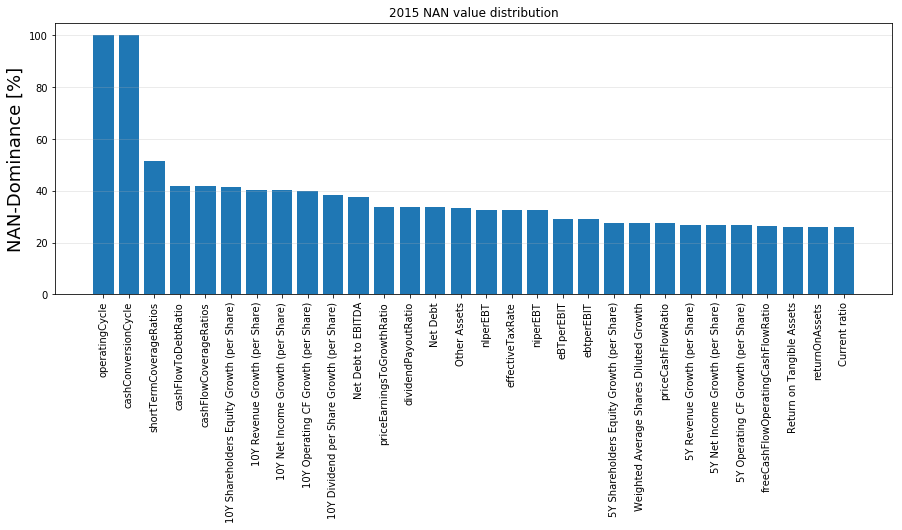

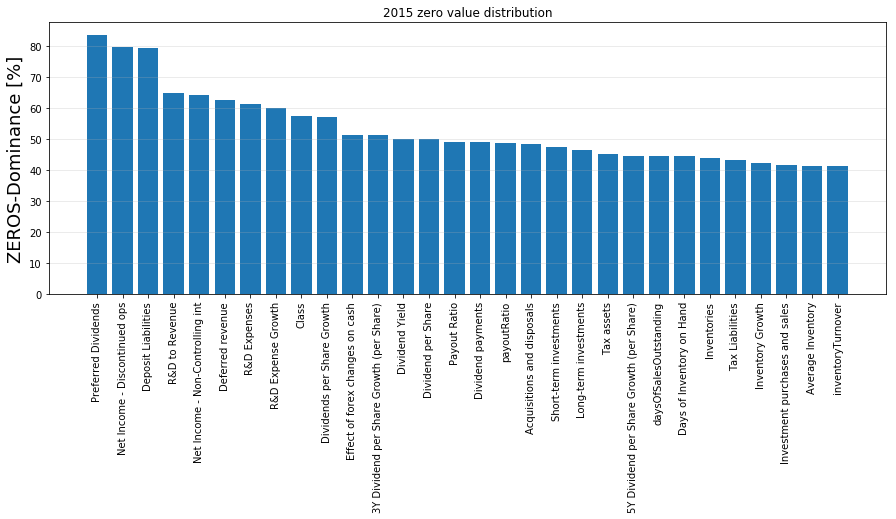

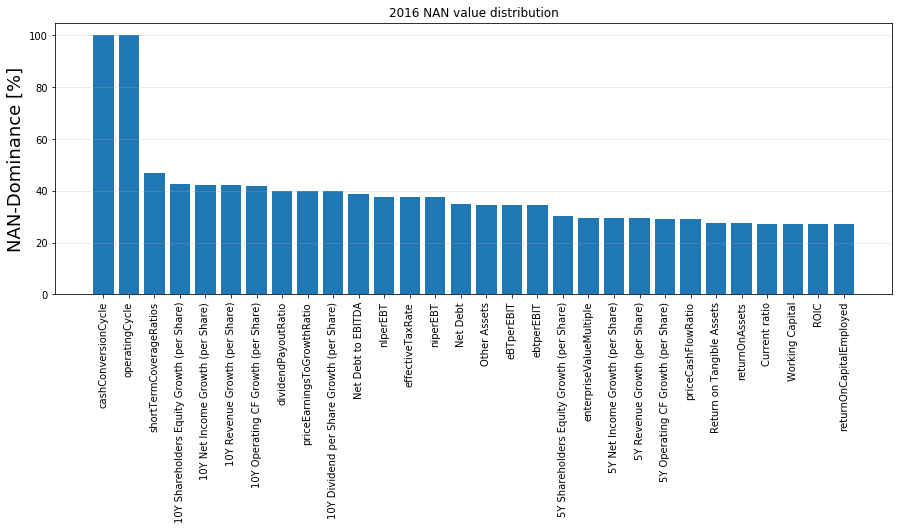

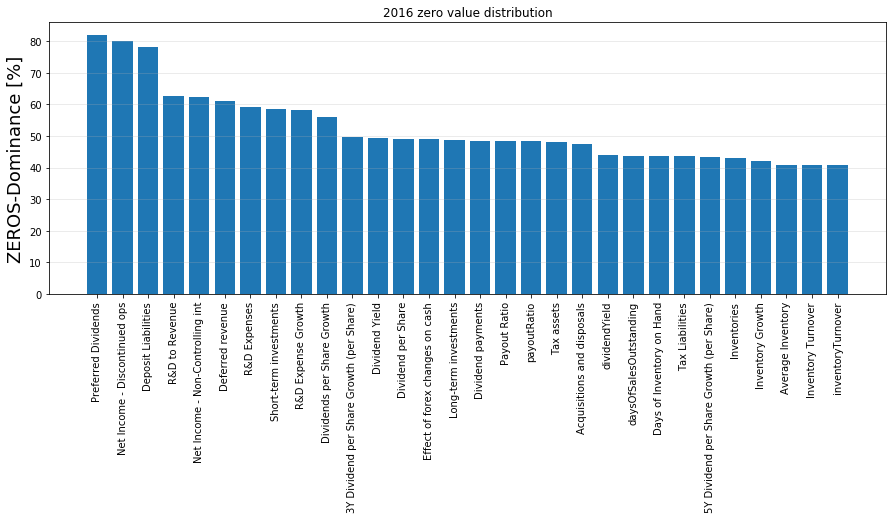

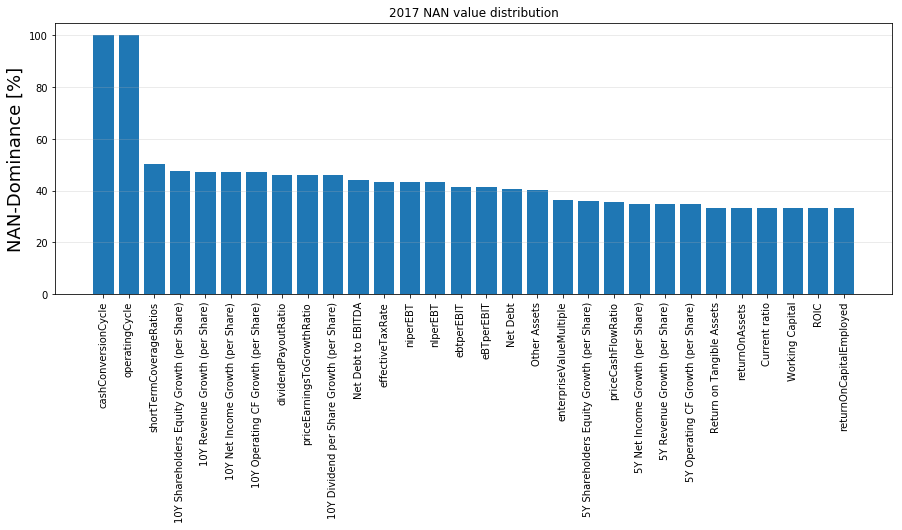

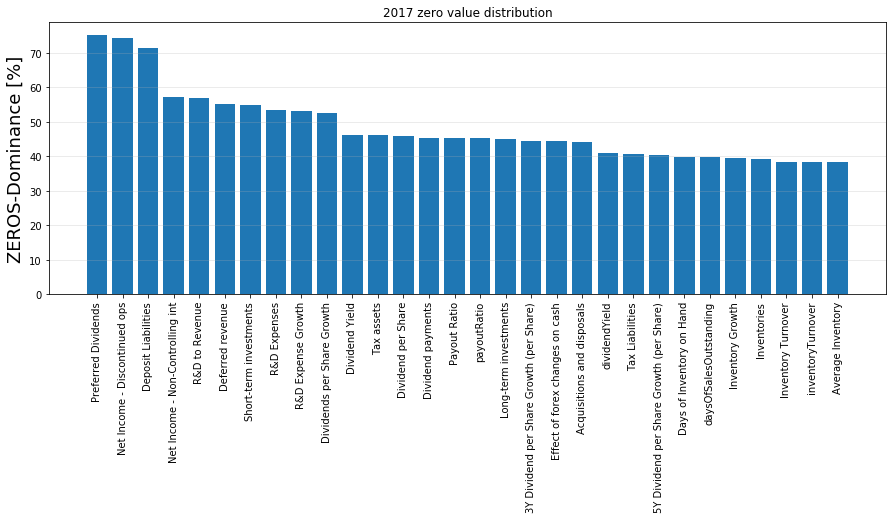

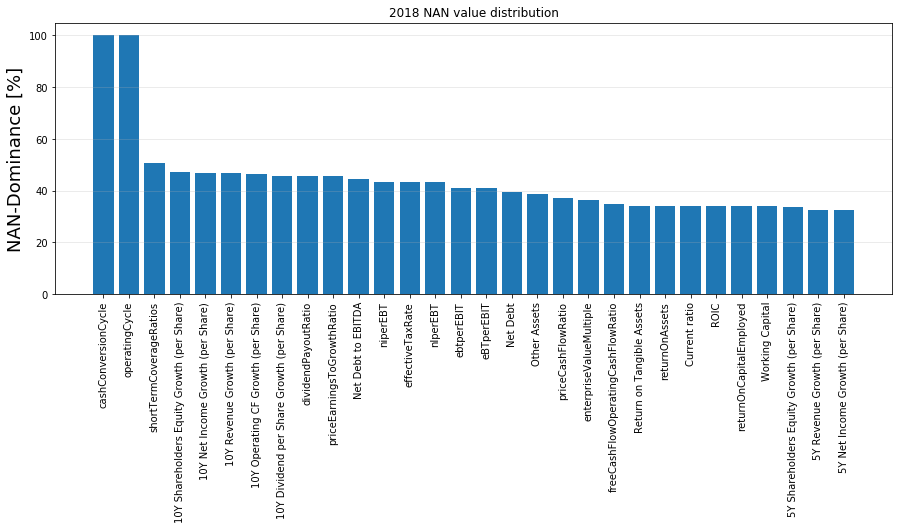

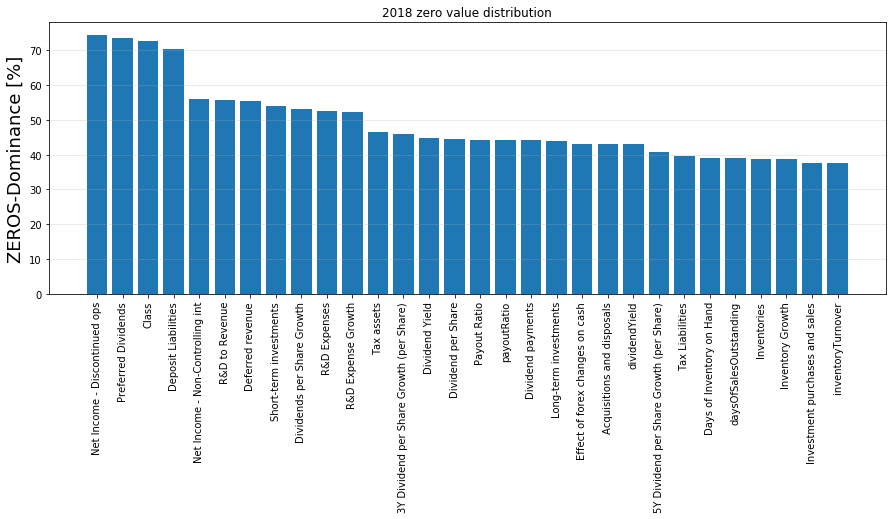

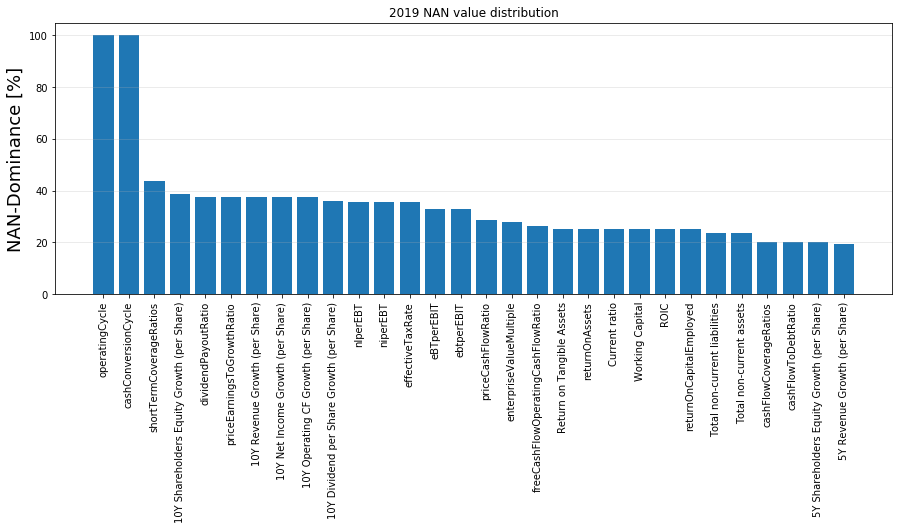

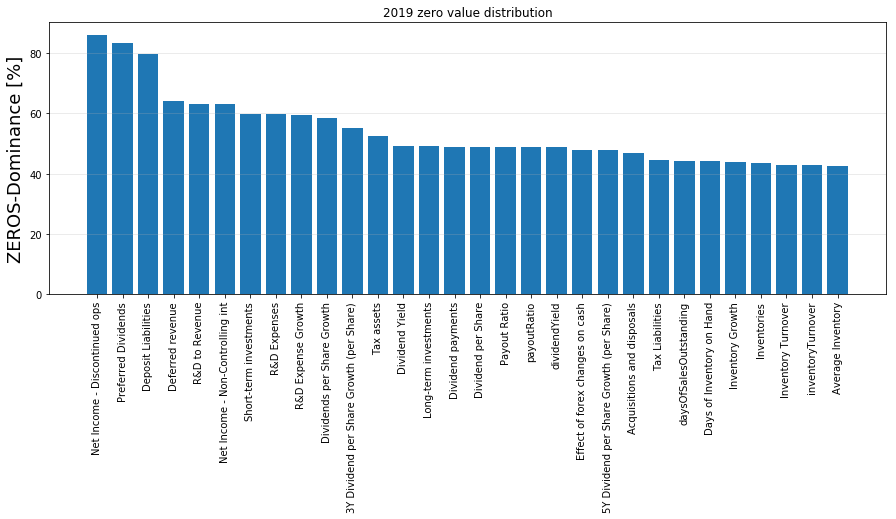

In [ ]:
y = 2015
for df in df_years:
    # Find count and percent of nan-values, zero-values
    total_nans = df.isnull().sum().sort_values(ascending=False)
    percent_nans = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
    total_zeros = df.isin([0]).sum().sort_values(ascending=False)
    percent_zeros = (df.isin([0]).sum()/df.isin([0]).count() * 100).sort_values(ascending=False)
    df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
    df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

    # Graphical representation
    plt.figure(figsize=(15,5))
    plt.bar(np.arange(30), df_nans['Percent NaN'].iloc[:30].values.tolist())
    plt.xticks(np.arange(30), df_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
    plt.ylabel('NAN-Dominance [%]', fontsize=18)
    plt.title(str(y)+" NAN value distribution")
    plt.grid(alpha=0.3, axis='y')
    plt.show()

    plt.figure(figsize=(15,5))
    plt.bar(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].values.tolist())
    plt.xticks(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation='90')
    plt.ylabel('ZEROS-Dominance [%]', fontsize=18)
    plt.title(str(y)+" zero value distribution")
    plt.grid(alpha=0.3, axis='y')
    plt.show()
    
    y+=1

The two plots above clearly show that to improve the quality of the dataframe `df` we need to:
1. fill the missing data
2. fill or drop those indicators that are heavy zeros-dominant.

**What levels of nan-dominance and zeros-dominance are we going to tolerate?**

I usually determine a threshold level for both nan-dominance and zeros-dominance, which corresponds to a given percentage of the total available samples (rows): **if a column has a percentage of nan-values and/or zero-valued entries higher than the threshold, I drop it**.

For this specific case we know that we have about 3800 samples, so I reckon we can set:
* nan-dominance threshold = 5-7%
* zeros-dominance threshold = 5-10%

Once the threshold levels have been set, I iteratively compute the `.quantile()` of both `df_nans` and `df_zeros` in order to find the number of financial indicators that I will be dropping. In this case, we can see that:
* We need to drop the top 50% (`test_nan_level=1-0.5=0.5`) nan-dominant financial indicators in order to not have columns with more than 226 `nan` values, which corresponds to a nan-dominance threshold of 5.9% (aligned with our initial guess).
* We need to drop the top 40% (`test_zeros_level=1-0.4=0.6`) zero-dominant financial indicators in order to not have columns with more than 283 `0` values, which corresponds to a zero-dominance threshold of 7.5% (aligned with our initial guess).

In [ ]:
for i in range(len(df_years)):
    df_years[i].dropna(how='all',inplace=True, axis=0)
    df_years[i].dropna(how='all',inplace=True, axis=1)

In [ ]:
for i in range(len(df_years)):
    continue
    print(df_years[i].isna().sum())
    print()

In [ ]:
for df in df_years:
    # Find count and percent of nan-values, zero-values
    total_nans = df.isnull().sum().sort_values(ascending=False)
    percent_nans = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
    total_zeros = df.isin([0]).sum().sort_values(ascending=False)
    percent_zeros = (df.isin([0]).sum()/df.isin([0]).count() * 100).sort_values(ascending=False)
    df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
    df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])
    
    # Find reasonable threshold for nan-values situation
    test_nan_level = 0.4
    print(df_nans.quantile(test_nan_level))
    _, thresh_nan = df_nans.quantile(test_nan_level)

    # Find reasonable threshold for zero-values situation
    test_zeros_level = 0.7
    print(df_zeros.quantile(test_zeros_level))
    _, thresh_zeros = df_zeros.quantile(test_zeros_level)
    print()

Total NaN      155.900000
Percent NaN      4.117802
Name: 0.3, dtype: float64
Total Zeros      285.600000
Percent Zeros      7.543582
Name: 0.6, dtype: float64

Total NaN      250.900000
Percent NaN      6.104623
Name: 0.3, dtype: float64
Total Zeros      261.200000
Percent Zeros      6.355231
Name: 0.6, dtype: float64

Total NaN      668.000000
Percent NaN     13.969051
Name: 0.3, dtype: float64
Total Zeros      299.400000
Percent Zeros      6.260979
Name: 0.6, dtype: float64

Total NaN      725.80000
Percent NaN     14.64783
Name: 0.3, dtype: float64
Total Zeros      301.000000
Percent Zeros      6.074672
Name: 0.6, dtype: float64

Total NaN      207.200000
Percent NaN      4.723045
Name: 0.3, dtype: float64
Total Zeros      284.600000
Percent Zeros      6.487349
Name: 0.6, dtype: float64



Once the threshold levels have been set, I can proceed and drop from `df` those columns (financial indicators) that show dominance levels higher than the threshold levels, in terms of both missing values and 0-valued entries.

So, we reduced the number of financial indicators available in the dataframe `df` to 62. By doing so, we removed all those columns characterized by heavy nan-dominance and zeros-dominance. 

*We should always keep in mind that this is quite a brute force approach, and there is the possibilty of having dropped useful information.*

In [ ]:
df_years_clean = []
for df in df_years:
    # Find count and percent of nan-values, zero-values
    total_nans = df.isnull().sum().sort_values(ascending=False)
    percent_nans = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
    total_zeros = df.isin([0]).sum().sort_values(ascending=False)
    percent_zeros = (df.isin([0]).sum()/df.isin([0]).count() * 100).sort_values(ascending=False)
    df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
    df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])
    
    # Find reasonable threshold for nan-values situation
    test_nan_level = 0.2
    _, thresh_nan = df_nans.quantile(test_nan_level)

    # Find reasonable threshold for zero-values situation
    test_zeros_level = 0.4
    _, thresh_zeros = df_zeros.quantile(test_zeros_level)
    
    # Clean dataset applying thresholds for both zero values, nan-values
    #print(f'INITIAL NUMBER OF VARIABLES: {df.shape[1]}')
    #print()

    df_test1 = df.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, 1)
    #print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {df_test1.shape[1]}')
    #print()

    df_zeros_postnan = df_zeros.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=0)
    df_test2 = df_test1.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
    print(f'NUMBER OF VARIABLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {df_test2.shape[1]}')
    df_years_clean.append(df_test2)
    print()

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 0.78%: 20

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 1.31%: 21

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 1.69%: 23

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 1.14%: 22

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 1.02%: 22



In [ ]:
df_years_clean[0]

# STEP 4: CORRELATION MATRIX, CHECK MISSING VALUES AGAIN

The correlation matrix is an important tool that can be used to quickly evaluate the linear correlation between variables, in this case financial indicators. As clearly explained [here](https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp), a positive linear correlation value between two variables means that they move in a similar way; a negative linear correlation value between two variables means that they move in opposite ways. Finally, if the correlation value is close to 0, then their trends are not related.

Looking at the figure below, we can see that there is a chunk of financial indicators that show no linear correlation whatsoever. Those financial indicators are the heavy nan-dominant ones (as highlighted in the barplot below). This means that this chart will change once we will fill the `nan` values.

In [ ]:
for df in df_years_clean:
    print(df.isna().sum())

We can evaluate the impact of our choices in terms of threshold levels by plotting again the count of missing values and 0-valued entries occurring in the remaining financial indicators. The situation has clearly improved, even if a few financial indicators mantain high levels of nan-dominance, which is evident when looking at the correlation matrix above.

In [ ]:
for df in df_years_clean:
    continue
    # New check on nan values
    plt.figure(figsize=(50,10))

    plt.subplot(2,1,1)
    plt.title('INFORMATION ABOUT DATASET - CLEANED NAN + ZEROS', fontsize=22)
    plt.bar(np.arange(df.shape[1]), df.isnull().sum())
    plt.ylabel('NAN-VALUES COUNT', fontsize=18)

    plt.subplot(2,1,2)
    plt.bar(np.arange(df.shape[1]), df.isin([0]).sum())
    plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
    plt.xticks(np.arange(df.shape[1]), df.columns.values, rotation='90')

    plt.show()

# STEP 5: HANDLE EXTREME VALUES

Analyzing the `df` with the method `.describe()` we can see that some financial indicators show a large discrepancy between max value and 75% quantile. Furthermore, we also have standard deviation values that are very large! This could be a sign of the presence of outliers: to be conservative, I will drop the top 3% and bottom 3% of the data for each financial indicator.

In [ ]:
# Analyze dataframe
# df_test2.describe()

Looking at the statistical description of the dataframe `df` post outliers removal, we can see that **we managed to decrease the standard deviation values considerably**, and also the discrepancy between max value and 75% quantile is smaller.

# STEP 6: FILL MISSING VALUES

We can now fill the missing values, but how? There are several methods we could use to fill the missing values:
* fill `nan` with 0
* fill `nan` with mean value of column
* fill `nan` with mode value of column
* fill `nan` with previous value
* ...

In this case, I think it is appropriate to fill the missing values with the mean value of the column. However, we must not forget the intrinsic characteristics of the data we are working with: **we have a many stocks from many different sectors**. It is fair to expect that each sector is characterized by macro-trends and macro-factors that may influence some financial indicators in different ways. So, I reckon that we should keep this separation somehow.

From a practical perspective, this translates into **filling the missing value with the mean value of the column, grouped by each sector**.

In [ ]:
df_years_clean[0].isna().sum().loc[lambda x : x>0].sort_values(ascending=False)

In [ ]:
df_what = df_years_clean[i].fillna(df_years_clean[0].groupby('Sector').transform('mean'))
df_what

In [ ]:
for i in range(len(df_years_clean)):
    # Replace nan-values with mean value of column, considering each sector individually.
    df_years_clean[i] = df_years_clean[i].fillna(df_years_clean[i].groupby('Sector').transform('mean'))
    #df_years_clean[i].drop('Sector', axis=1, inplace=True)
    #df_years_clean[i] = df_years_clean[i].apply(lambda x: x.fillna(x.mean()),axis=0)
    #df_what = df_what.dropna(how='all')
    #df_years_clean[i] = df_what.dropna(how='all', axis=1)

In [ ]:
df_years_clean[0]

In [ ]:
y = 2015
for df in df_years_clean:
    # New check on nan values
    plt.figure(figsize=(50,10))

    plt.subplot(2,1,1)
    plt.title(str(y) + ' INFORMATION ABOUT DATASET - CLEANED NAN + ZEROS', fontsize=22)
    plt.bar(np.arange(df.shape[1]), df.isnull().sum())
    plt.ylabel('NAN-VALUES COUNT', fontsize=18)

    plt.subplot(2,1,2)
    plt.bar(np.arange(df.shape[1]), df.isin([0]).sum())
    plt.ylabel(str(y) + ' ZERO-VALUES COUNT', fontsize=18)
    plt.xticks(np.arange(df.shape[1]), df.columns.values, rotation='90')

    plt.show()
    y+=1

Once that's done, we can plot again the correlation matrix in order to evaluate the impact of our choices.

In [ ]:
# Plot correlation matrix of output dataset
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

As we can see, the chunk of financial indicators that was characterized by linear correlation equal to 0 is now more organic (i.e. correlation is either positive or negative), thanks to the fact that we replaced the missing values with the respective mean value of the column (per-sector).

# STEP 7: ADD TARGET DATA

As you recall, we dropped the target data from the dataframe. However, we need it back in order to use this dataset with ML algorithms. This can be easily achieved thanks to a couple `.join()` lines.

Finally, we can wrap this notebook up by printing both `.info()` and `.describe()` of the final dataframe `df_out`.

In [ ]:
df_years_clean[0]

In [ ]:
df_years_clean[0]

In [ ]:
df_outs = []
df_sec = []
y=2015
for i in range(len(df_years_clean)):
    # Add the sector column
    #df_out = df_years_clean[i].join(df_years[i][str(y)+' PRICE VAR [%]'])

    # Add back the classification columns
    #df_out = df_years_clean[i].join()

    # Print information about dataset
    #df_out.info()
    #df_out.describe()
    #df_out.dropna(how='any', inplace=True)
    df_outs.append(df_years_clean[i])
    df_sec.append(df_years_clean[i]['Sector'])
    #y += 1

In [ ]:
df_int = df_outs[0].describe()
df_int = df_int.drop(['Total assets', 'Total liabilities'], axis=1)
df_int
plt.figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
plt.plot(df_int.min(), label="min")
plt.plot(df_int.max(), label="max")
plt.plot(df_int.mean(), label="mean")
plt.plot(df_int.std(), label="std")
plt.legend(loc='upper right')
plt.title("indicator value distribution")
plt.xlabel('indicator')
plt.ylabel('value')
plt.xticks(rotation=90)
plt.show()

In [ ]:
for df_out in df_outs:
    # Find count and percent of nan-values, zero-values
    total_nans = df_out.isnull().sum().sort_values(ascending=False)
    percent_nans = (df_out.isnull().sum()/df_out.isnull().count() * 100).sort_values(ascending=False)
    total_zeros = df_out.isin([0]).sum().sort_values(ascending=False)
    percent_zeros = (df_out.isin([0]).sum()/df_out.isin([0]).count() * 100).sort_values(ascending=False)
    df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
    df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

    # Graphical representation
    plt.figure(figsize=(15,5))
    plt.bar(np.arange(30), df_nans['Percent NaN'].iloc[:30].values.tolist())
    plt.xticks(np.arange(30), df_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
    plt.ylabel('NAN-Dominance [%]', fontsize=18)
    plt.grid(alpha=0.3, axis='y')
    plt.show()

    plt.figure(figsize=(15,5))
    plt.bar(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].values.tolist())
    plt.xticks(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation='90')
    plt.ylabel('ZEROS-Dominance [%]', fontsize=18)
    plt.grid(alpha=0.3, axis='y')
    plt.show()

In this notebook, we explored the financial indicators for a list of stocks relative to 2014. After an initial investigation regarding general aspects of the dataset, we performed some data cleaning steps in order to improve the usability of the dataset.

Feel free to fork this notebook and add your own touch.

# STEP 8: Machine learning(May not sufficient enough)


In [ ]:
#pd.unique(df_outs[0]['Sector'])
df_out.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import ElasticNet, Ridge, LassoCV, BayesianRidge, LassoLarsIC, SGDRegressor, LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import re
from xgboost import plot_importance
from sklearn import metrics

df_out = df_outs[4]
#x_train = df_out[df_out['Sector']=='Consumer Defensive'].drop(['Sector', '2015 PRICE VAR [%]'], axis=1)
#y_train = df_out[df_out['Sector']=='Consumer Defensive']['2015 PRICE VAR [%]']

#x_train = df_out.drop(['Sector', '2015 PRICE VAR [%]'], axis=1)
#y_train = df_out[['2015 PRICE VAR [%]']]

#df_out = df_out[df_out['Sector']=='Technology'].drop(['Sector'], axis=1)
df_out.loc[df_out['Sector'] == 'Consumer Defensive', 'Sector'] = 1
df_out.loc[df_out['Sector'] == 'Basic Materials', 'Sector'] = 2
df_out.loc[df_out['Sector'] == 'Healthcare', 'Sector'] = 3
df_out.loc[df_out['Sector'] == 'Consumer Cyclical', 'Sector'] = 4
df_out.loc[df_out['Sector'] == 'Industrials', 'Sector'] = 5
df_out.loc[df_out['Sector'] == 'Real Estate', 'Sector'] = 6
df_out.loc[df_out['Sector'] == 'Communication Services', 'Sector'] = 7
df_out.loc[df_out['Sector'] == 'Energy', 'Sector'] = 8
df_out.loc[df_out['Sector'] == 'Financial Services', 'Sector'] = 9
df_out.loc[df_out['Sector'] == 'Utilities', 'Sector'] = 10
df_out.loc[df_out['Sector'] == 'Technology', 'Sector'] = 11
#df_out = df_out.drop(['Sector'], axis=1)

#Train data process
clf = IsolationForest(contamination="auto" ,behaviour="new").fit_predict(df_out)
mask = clf != -1
df_out = df_out[mask]

# Cut outliers
top_quantiles = df_out.quantile(0.95)
outliers_top = (df_out > top_quantiles)

low_quantiles = df_out.quantile(0.05)
outliers_low = (df_out < low_quantiles)

df_out = df_out.mask(outliers_top, top_quantiles, axis=1)
df_out = df_out.mask(outliers_low, low_quantiles, axis=1)
x = df_out.drop('2019 PRICE VAR [%]', axis=1)
x[x.columns] = StandardScaler().fit_transform(x[x.columns])
y = df_out[['2019 PRICE VAR [%]']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=x['Sector'])

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'gamma': 0, #fix
    'max_depth': 20, #fix
    'lambda': 3,
    'subsample': 0.1, #fix
    'colsample_bytree': 0.4, 
    'min_child_weight': 6, 
    'eta': 0.01,
    'seed': 1000,
    'nthread': 4
}
dtrain = xgb.DMatrix(x_train, y_train)
num_rounds = 800
training = False
minMSE = 10000
minStr = ""

if training:
    lambdaa = [3]
    colsample_bytree = [0.4]
    min_child_weight = [i for i in range(3,8)]
    eta = [0.01]

    for a in range(1):
        for b in range(1):
            for c in range(5):
                for d in range(1):
                    print(lambdaa[a], colsample_bytree[b], min_child_weight[c], eta[d])
                    param = params.copy()
                    param['lambdaa'] = lambdaa[a]
                    param['colsample_bytree'] = colsample_bytree[b]
                    param['min_child_weight'] = min_child_weight[c]
                    param['eta'] = eta[d]

                    plst = list(param.items())
                    model = xgb.train(plst, dtrain, num_rounds)
                    predict_y_train = model.predict(xgb.DMatrix(x_train))
                    predict_y_test = model.predict(xgb.DMatrix(x_test))
                    trainMSE = metrics.mean_squared_error(y_train, predict_y_train)
                    testMSE = metrics.mean_squared_error(y_test, predict_y_test)
                    print("trainMSE:", trainMSE)
                    print("testMSE:", testMSE)
                    if testMSE < minMSE:
                        minMSE = testMSE
                        minStr = str(lambdaa[a])+","+str(colsample_bytree[b])+","+str(min_child_weight[c])+","+str(eta[d])
    print(minMSE)
    print(minStr)
else:
    plst = list(params.items())
    model = xgb.train(plst, dtrain, num_rounds)
    predict_y_train = model.predict(xgb.DMatrix(x_train))
    predict_y_test = model.predict(xgb.DMatrix(x_test))
    trainMSE = metrics.mean_squared_error(y_train, predict_y_train)
    testMSE = metrics.mean_squared_error(y_test, predict_y_test)
    print("trainMSE:", trainMSE)
    print("testMSE:", testMSE)
    predi = [i[0] for i in y_test.values]
    res = predi*predict_y_test
    print(1 - sum(x <= 0 for x in res) / len(res))
    fig, ax = plt.subplots(figsize=(10,8))
    plot_importance(model, ax=ax)
    plt.show()



"""
plt.figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')
plt.plot(predict_y_test[0:200], label="Prediction")
plt.plot(y_test.iloc[0:200, :], label="Truth")
plt.xlabel('Prediction result')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()
"""


#predi = [i[0] for i in y_test.values]
#res = predi*predict_y_test
#print(1 - sum(x <= 0 for x in res) / len(res))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

lrs = [0.1, 0.01, 0.001, 0.0001]
lys = [2, 3, 4]
units = [256, 128, 64]
l2s = [0.01, 0.1, 1, 0.001]


def train_model(X, learning_rate, layer, l2):
    input_layer = Input(shape=(X.shape[1],))
    dense_layer = Dense(units[0], activation='relu', kernel_regularizer=regularizers.l2(l2s[l2]))(input_layer)
    dense_layer = Dense(units[0], activation='relu')(dense_layer)

    if layer+1 >= 2:
        dense_layer = Dense(units[1], kernel_regularizer=regularizers.l2(l2s[l2]), activation='relu')(dense_layer)
        dense_layer = Dropout(0.5)(dense_layer)

    if layer+1 >= 3:
        dense_layer = Dense(units[2], kernel_regularizer=regularizers.l2(l2s[l2]), activation='relu')(dense_layer)
        dense_layer = Dropout(0.5)(dense_layer)
        
    output = Dense(1)(dense_layer)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(), metrics=["mean_squared_error"])
    return model


#0.0001,3,0.01: 470.6719527202282
result_dddict = {}
for a in range(4):
    for b in range(3):
        for c in range(4):
            model = train_model(x_train, a, b, c)
            model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=2, validation_split=0.3)
            pred = model.predict(x_test)
            print(mean_squared_error(y_test, pred))
            result_dddict[str(lrs[a])+","+str(lys[b])+","+str(l2s[c])] = mean_squared_error(y_test, pred)

"""

model = train_model(x_train, 0, 1, 1)
model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=2, validation_split=0.3)
pred = model.predict(x_test)
print(mean_squared_error(y_test, pred))
"""





In [ ]:
result_dddict

In [ ]:
model = train_model(x_train, 3, 2, 3)
model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=2, validation_split=0.3)
pred = model.predict(x_test)
predi = [i[0] for i in y_test.values]
res = predi*predict_y_test
1 - sum(x <= 0 for x in res) / len(res)

# Data visualization & analysis

In [ ]:
from sklearn.ensemble import IsolationForest
df_outps = []
for i in range(len(df_outs)):
    df_out = df_outs[i]
    
    df_out.loc[df_out['Sector'] == 'Consumer Defensive', 'Sector'] = 1
    df_out.loc[df_out['Sector'] == 'Basic Materials', 'Sector'] = 2
    df_out.loc[df_out['Sector'] == 'Healthcare', 'Sector'] = 3
    df_out.loc[df_out['Sector'] == 'Consumer Cyclical', 'Sector'] = 4
    df_out.loc[df_out['Sector'] == 'Industrials', 'Sector'] = 5
    df_out.loc[df_out['Sector'] == 'Real Estate', 'Sector'] = 6
    df_out.loc[df_out['Sector'] == 'Communication Services', 'Sector'] = 7
    df_out.loc[df_out['Sector'] == 'Energy', 'Sector'] = 8
    df_out.loc[df_out['Sector'] == 'Financial Services', 'Sector'] = 9
    df_out.loc[df_out['Sector'] == 'Utilities', 'Sector'] = 10
    df_out.loc[df_out['Sector'] == 'Technology', 'Sector'] = 11

    #Train data process
    clf = IsolationForest(contamination="auto" ,behaviour="new").fit_predict(df_out)
    mask = clf != -1
    df_out = df_out[mask]

    # Cut outliers
    top_quantiles = df_out.quantile(0.95)
    outliers_top = (df_out > top_quantiles)

    low_quantiles = df_out.quantile(0.05)
    outliers_low = (df_out < low_quantiles)

    df_out = df_out.mask(outliers_top, top_quantiles, axis=1)
    df_out = df_out.mask(outliers_low, low_quantiles, axis=1)
    
    df_out.loc[df_out['Sector'] == 1, 'Sector'] = 'Consumer Defensive'
    df_out.loc[df_out['Sector'] == 2, 'Sector'] = 'Basic Materials'
    df_out.loc[df_out['Sector'] == 3, 'Sector'] = 'Healthcare'
    df_out.loc[df_out['Sector'] == 4, 'Sector'] = 'Consumer Cyclical'
    df_out.loc[df_out['Sector'] == 5, 'Sector'] = 'Industrials'
    df_out.loc[df_out['Sector'] == 6, 'Sector'] = 'Real Estate'
    df_out.loc[df_out['Sector'] == 7, 'Sector'] = 'Communication Services'
    df_out.loc[df_out['Sector'] == 8, 'Sector'] = 'Energy'
    df_out.loc[df_out['Sector'] == 9, 'Sector'] = 'Financial Services'
    df_out.loc[df_out['Sector'] == 10, 'Sector'] = 'Utilities'
    df_out.loc[df_out['Sector'] == 11, 'Sector'] = 'Technology'
    df_outps.append(df_out)

In [ ]:
df_outps[0]

# Indicator analysis: How feature influences 2015 PRICE VAR 

In [ ]:
y = 2015
for df_out in df_outps:
    value = str(y) + ' PRICE VAR [%]'
    for sector in pd.unique(df_out['Sector']):
        df_sec = df_out[df_out['Sector'] == sector]
        df_cor = df_sec.corr().loc[:, [value]].drop(value, axis=0)
        #print(df_cor)
        df_cor_check = df_cor.copy()
        df_cor_check['bin'] = 'NA'
        df_cor_check.loc[df_cor_check[value] > 0.15, 'bin']= 'positive'
        df_cor_check.loc[df_cor_check[value] < -0.15, 'bin']= 'negative'
        df_cor_check.loc[(df_cor_check[value] <= 0.15) & (df_cor_check[value] >= -0.15), 'bin']= 'no_influence'
        result_df = df_cor_check[(df_cor_check['bin'] != 'no_influence') & (df_cor_check['bin'] != 'NA')]
        if len(result_df) > 0:
            print(sector)
            print(result_df)
    y += 1
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

# Indicator analysis: Linear regression to find presiction model

In [ ]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

y=2015
diff_secs = []
#df_out = df_outs[0]
for df_out in df_outps:
    continue
    corr_dict = {}
    for sector in pd.unique(df_out['Sector']):
        df_sec = df_out[df_out['Sector'] == sector]
        df_cor = df_sec.corr().loc[:, [str(y)+' PRICE VAR [%]']].drop([str(y)+' PRICE VAR [%]'], axis=0)
        df_cor_check = df_cor[(df_cor[str(y)+' PRICE VAR [%]'] > 0.1) | (df_cor[str(y)+' PRICE VAR [%]'] < -0.1)]
        col_list = df_cor_check.index.values.tolist()
        if col_list and False:
            col_list.append(str(y)+' PRICE VAR [%]')
            col_list.append('Sector')
            df_sec = df_sec[col_list]
            print(df_sec.head())
        if col_list:
            corr_dict[sector] = col_list
    cols = [i for i in corr_dict.keys()]
    idxs = []
    for val in corr_dict.values():
        for ele in val:
            if ele not in idxs:
                idxs.append(ele)
    corr_dictt = {}
    for col in cols:
        corr_dictt[col] = []

    corr_dictt['Sector'] = idxs
    for idx in idxs:
        for col in corr_dict.keys():
            if idx in corr_dict[col]:
                corr_dictt[col] = corr_dictt[col] + [1]
            else:
                corr_dictt[col] = corr_dictt[col] + [0]

    df_corr = pd.DataFrame(corr_dictt)
    df_corr = df_corr.set_index('Sector')

    f, ax = plt.subplots(figsize=(8, 8))
    colors = ["black", "lightgray"]
    cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

    # Draw the heatmap with the mask and correct aspect ratio
    _ = sns.heatmap(df_corr, cmap=cmap,square=True,  linewidths=.5, cbar_kws={"shrink": .5})
    # Set the colorbar labels
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([0.25,0.75])
    colorbar.set_ticklabels(['0', '1'])
    
    y+=1

In [ ]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

y=2015
diff_secs = []
#df_out = df_outs[0]
for df_out in df_outps:
    corr_dict = {}
    corr_dictn = {}
    for sector in pd.unique(df_out['Sector']):
        df_sec = df_out[df_out['Sector'] == sector]
        df_cor = df_sec.corr().loc[:, [str(y)+' PRICE VAR [%]']].drop([str(y)+' PRICE VAR [%]'], axis=0)
        df_cor_check1 = df_cor[df_cor[str(y)+' PRICE VAR [%]'] > 0.15]
        col_list1 = df_cor_check1.index.values.tolist()
        df_cor_check2 = df_cor[df_cor[str(y)+' PRICE VAR [%]'] < -0.15]
        col_list2 = df_cor_check2.index.values.tolist()
        if col_list1:
            corr_dict[sector] = col_list1
        if col_list2:
            corr_dictn[sector] = col_list2
            
    #print(corr_dict)
    #print(corr_dictn)       
    cols = list(set().union([sec for sec in corr_dict.keys()], [sec for sec in corr_dictn.keys()]))
    idxs = []
    for val in corr_dict.values():
        for ele in val:
            if ele not in idxs:
                idxs.append(ele)
    for val in corr_dictn.values():
        for ele in val:
            if ele not in idxs:
                idxs.append(ele)
    
    corr_dictt = {}
    for col in cols:
        corr_dictt[col] = []

    corr_dictt['Sector'] = idxs
    for idx in idxs:
        for sec in cols:
            found = False
            if sec in corr_dict.keys():
                if idx in corr_dict[sec]:
                    found = True
                    corr_dictt[sec] = corr_dictt[sec] + [1]
            if sec in corr_dictn.keys():
                if idx in corr_dictn[sec]:
                    found = True
                    corr_dictt[sec] = corr_dictt[sec] + [-1]
            if not found:
                corr_dictt[sec] = corr_dictt[sec] + [0]
    
    #print(corr_dictt)
    df_corr = pd.DataFrame(corr_dictt)
    df_corr = df_corr.set_index('Sector')

    f, ax = plt.subplots(figsize=(8, 8), dpi=300)
    colors = ["red", "orange", "yellow"]
    cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

    # Draw the heatmap with the mask and correct aspect ratio
    _ = sns.heatmap(df_corr, cmap=cmap,square=True,  linewidths=.5, cbar_kws={"shrink": .5})
    ax.set_title('Year '+str(y)+' Sector&Price_variation Correlation')
    
    # Set the colorbar labels
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([-0.75, 0, 0.75])
    colorbar.set_ticklabels(['negative','no_influence', 'positive'])
    
    y+=1

As the result shown below, the sector **Healthcare** and **Financial Services** don't have important indicator, which means that it is more difficult to predict these two sectors.

In [ ]:
list(set().union([2,5],[2,3]))

In [ ]:
# Plot correlation matrix of output dataset
fig, ax = plt.subplots(figsize=(1,30)) 
sns.heatmap(df_cor, annot=False, cmap='rocket', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

In [ ]:
df_outs[0].to_excel("input2014.xlsx")
df_outs[1].to_excel("input2015.xlsx")
df_outs[2].to_excel("input2016.xlsx")
df_outs[3].to_excel("input2017.xlsx")
df_outs[4].to_excel("input2018.xlsx")